# Statistical Modeling

## Importing Libraries and Modules

First, Let import the necessary libraries for data manipulation, modeling, and visualization. Additionally, the custom `InsuranceModeling` class is imported from the `statisticalModel` module.


In [1]:
# Import necessary libraries and modules
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.statisticalModel import InsuranceModeling

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the Dataset

We load the data from the `MachineLearningRating_v3.txt` file, which contains insurance records, using `pandas.read_csv()`.


In [2]:
#Reading the txt file MachineLearningRating_v3.txt
data_path = '../data/MachineLearningRating_v3.txt'
df=pd.read_csv(data_path, delimiter='|')

df.head()

C:\Users\Coop\AppData\Local\Temp\ipykernel_15732\633644885.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path, delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data Preprocessing Steps

Here I perform three major steps: wrangling the data, engineering new features, and encoding categorical variables.


In [3]:
iml = InsuranceModeling(df)

In [4]:
data = iml.wrangle_data()

In [6]:
data.columns

Index(['TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType',
       'Title', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Province',
       'PostalCode', 'VehicleType', 'RegistrationYear', 'make', 'Model',
       'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors',
       'VehicleIntroDate', 'CapitalOutstanding', 'SumInsured',
       'CalculatedPremiumPerTerm', 'CoverGroup', 'Section', 'Product',
       'TotalPremium', 'TotalClaims'],
      dtype='object')

In [6]:
iml.feature_engineering()

,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,Gender,Province,...,CalculatedPremiumPerTerm,CoverGroup,Section,Product,TotalPremium,TotalClaims,VehicleAge,PremiumPerUnitSumInsured,ClaimToPremiumRatio,VehiclePowerToWeightRatio
393216,2015-05-01 00:00:00,False,,Individual,Mr,First National Bank,Current account,Not specified,Not specified,Western Cape,...,288.9327,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,253.449737,0.0,2,0.000507,0.0,0.030072
393217,2014-10-01 00:00:00,False,,Individual,Mr,Nedbank,Current account,Not specified,Not specified,Gauteng,...,85.0000,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,0.000000,0.0,4,0.000000,0.0,0.042500
393218,2015-07-01 00:00:00,False,,Individual,Mr,First National Bank,Current account,Not specified,Not specified,Western Cape,...,288.9327,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,253.449737,0.0,2,0.000507,0.0,0.030072
393219,2014-12-01 00:00:00,False,,Individual,Mr,Nedbank,Current account,Not specified,Not specified,Gauteng,...,85.0000,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,0.000000,0.0,4,0.000000,0.0,0.042500
393220,2015-07-01 00:00:00,False,,Individual,Mr,First National Bank,Current account,Not specified,Not specified,Western Cape,...,2.5017,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,0.000000,0.0,2,0.000000,0.0,0.030072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983035,2015-07-01 00:00:00,False,ZA,Individual,Ms,ABSA Bank,Current account,Not specified,Not specified,KwaZulu-Natal,...,8.3967,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,0.237598,0.0,0,0.000032,0.0,0.030072
983036,2014-11-01 00:00:00,False,ZA,Individual,Mr,Nedbank,Savings account,Not specified,Male,Gauteng,...,18.0000,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,0.000000,0.0,3,0.000000,0.0,0.030072
983037,2014-07-01 00:00:00,False,ZA,Individual,Mr,ABSA Bank,Savings account,Not specified,Not specified,Western Cape,...,4.9029,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,4.300789,0.0,5,0.000573,0.0,0.041203
983038,2015-02-01 00:00:00,False,ZA,Individual,Mr,ABSA Bank,Savings account,Not specified,Not specified,Western Cape,...,4.9029,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,4.300789,0.0,5,0.000573,0.0,0.041203


In [7]:
encoded_data = iml.encode_categorical_data()
encoded_data.head()

,IsVATRegistered,PostalCode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,...,CoverGroup_Motor Comprehensive,CoverGroup_Standalone passenger liability,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",Product_Mobility Commercial Cover: Monthly,Product_Mobility Metered Taxis: Monthly,Product_Standalone Passenger Liability
393216,False,8000,2013,4.0,2494.0,75.0,4.0,0.0,500000.0,288.9327,...,False,False,False,True,False,False,False,True,False,False
393217,False,190,2011,4.0,2400.0,102.0,4.0,184700.0,7000.0,85.0000,...,False,False,False,False,True,False,False,True,False,False
393218,False,8000,2013,4.0,2494.0,75.0,4.0,0.0,500000.0,288.9327,...,False,False,False,True,False,False,False,True,False,False
393219,False,190,2011,4.0,2400.0,102.0,4.0,184700.0,7000.0,85.0000,...,False,False,False,False,True,False,False,True,False,False
393220,False,8000,2013,4.0,2494.0,75.0,4.0,0.0,5000000.0,2.5017,...,False,False,False,True,False,False,False,True,False,False


## Splitting the Data into Training and Test Sets

The data is divided into training and test sets for both `TotalClaims` and `TotalPremium`.

In [8]:
X_train, X_test, y_claims_train, y_claims_test, X_train_premium, X_test_premium, y_premium_train, y_premium_test = iml.train_test_split()

## Building and Evaluating Claims Prediction Models

We build and evaluate models for predicting claims using different algorithms: Linear Regression, Decision Trees, Random Forest, and XGBoost.


In [9]:
models_claims = iml.build_models(X_train, y_claims_train)
results_claims = iml.evaluate_models(models_claims, X_test, y_claims_test)

In [12]:
print("Claims Prediction Model Evaluation:")
for model_name, metrics in results_claims.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

Claims Prediction Model Evaluation:
Linear Regression: MSE = 0.0, R2 = 1.0
Decision Tree: MSE = 0.0, R2 = 1.0
Random Forest: MSE = 0.0, R2 = 1.0
XGBoost: MSE = 0.0, R2 = 1.0


## Feature Importance Analysis for Claims (Random Forest)

If a Random Forest model is built, we analyze the feature importance for claims prediction.




Feature Importance Analysis for Random Forest (Claims):


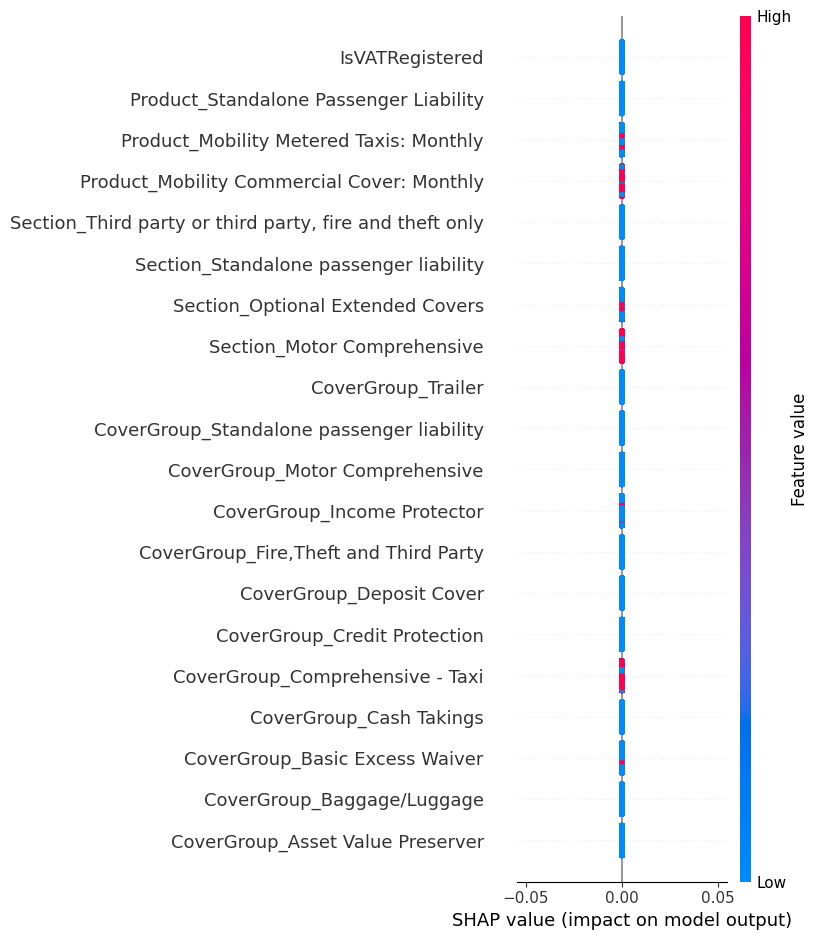

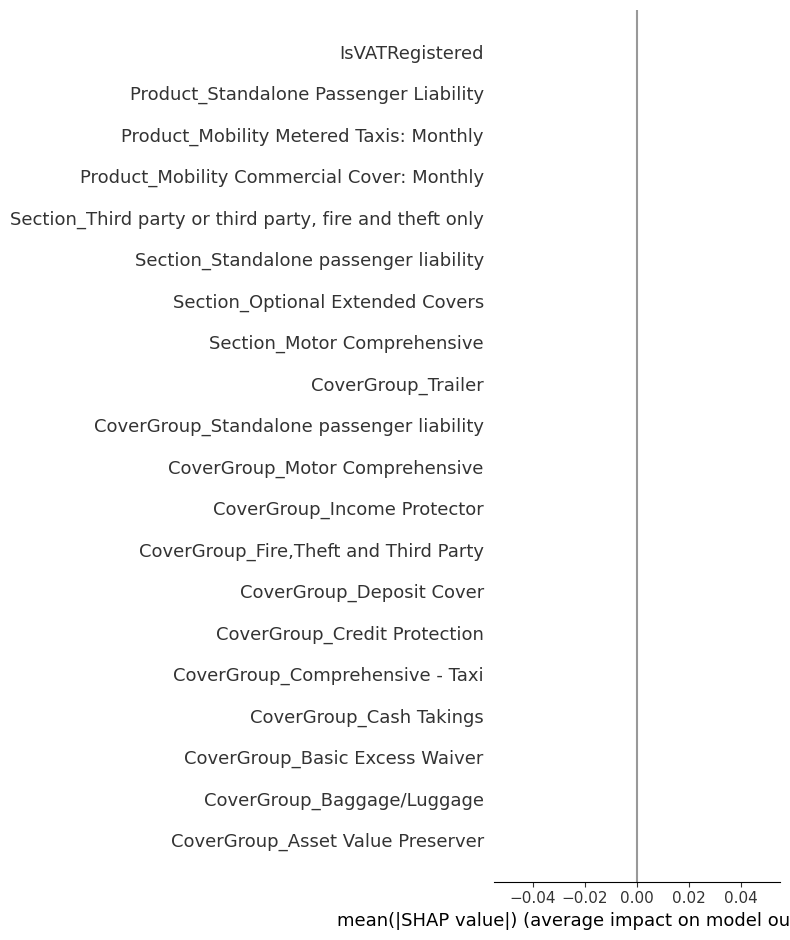

In [13]:
# Feature importance analysis for RandomForest (example)
if 'Random Forest' in models_claims:
    print("\nFeature Importance Analysis for Random Forest (Claims):")
    iml.analyze_feature_importance(models_claims['Random Forest'], X_train, X_train.columns)

## Building and Evaluating Premium Prediction Models

Similarly, Let build models for premium prediction using the same algorithms and evaluate their performance.


In [10]:
# For premium prediction
models_premium = iml.build_models(X_train_premium, y_premium_train)
results_premium = iml.evaluate_models(models_premium, X_test_premium, y_premium_test)

In [15]:
print("\nPremium Prediction Model Evaluation:")
for model_name, metrics in results_premium.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")


Premium Prediction Model Evaluation:
Linear Regression: MSE = 26658053.711629737, R2 = -1099.1886157348265
Decision Tree: MSE = 139.40033557184856, R2 = 0.9942468919942623
Random Forest: MSE = 86.70746489359907, R2 = 0.9964215479941978
XGBoost: MSE = 36.81560261393661, R2 = 0.9984806052491522


## Feature Importance Analysis for Premium (Random Forest)

If a Random Forest model is built, we perform feature importance analysis for premium prediction using the model's built-in `feature_importances_` attribute.



Feature Importance Analysis for Random Forest (premium):
Top 10 important features:
                                  Feature  Importance
9               CalculatedPremiumPerTerm    0.543372
11              PremiumPerUnitSumInsured    0.451840
8                             SumInsured    0.002174
25  TransactionMonth_2014-10-01 00:00:00    0.000127
26  TransactionMonth_2014-11-01 00:00:00    0.000125
10                            VehicleAge    0.000120
2                       RegistrationYear    0.000101
4                          cubiccapacity    0.000096
1                             PostalCode    0.000092
72         VehicleType_Passenger Vehicle    0.000079


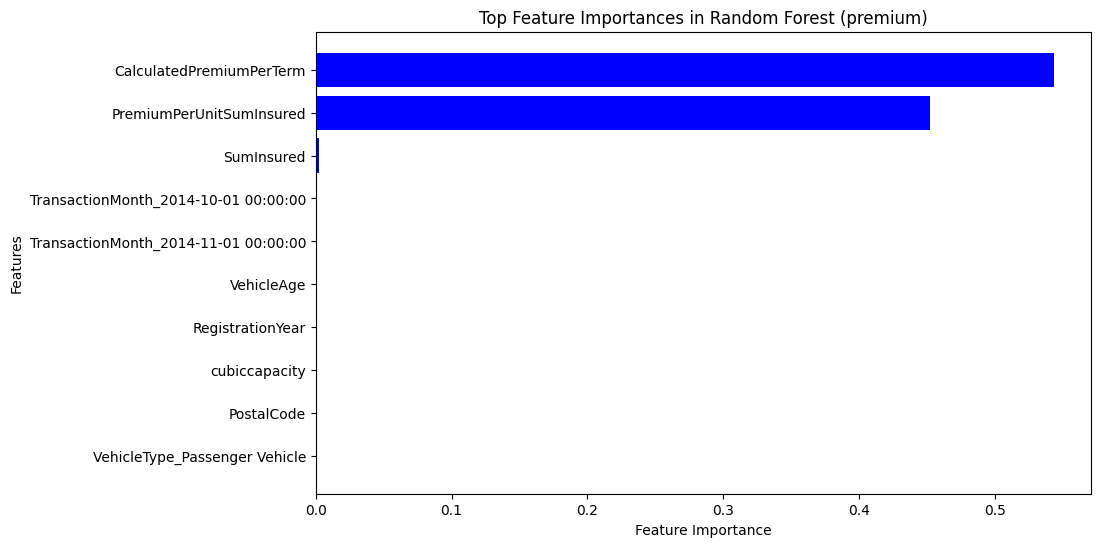

In [11]:
# Ensure the model is trained before analyzing feature importance
if 'Random Forest' in models_premium:
    print("\nFeature Importance Analysis for Random Forest (premium):")

    # Retrieve the model
    rf_model = models_premium['Random Forest']

    # Get feature importance directly from the model
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame to hold feature names and their importance scores
    feature_importance_df = pd.DataFrame({
        'Feature': X_train_premium.columns,
        'Importance': feature_importances
    })

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N important features (e.g., top 10)
    top_n = 10  # Adjust this as needed
    print(f"Top {top_n} important features:\n", feature_importance_df.head(top_n))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'].head(top_n), feature_importance_df['Importance'].head(top_n), color='blue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Top Feature Importances in Random Forest (premium)')
    plt.gca().invert_yaxis()
    plt.show()

### **Overall Insights**

1. **Claims Prediction**: All models show perfect performance, indicating either a very strong pattern in the data or potential overfitting. Further investigation is recommended.
  
2. **Premium Prediction**: **XGBoost** outperforms other models with the lowest MSE and highest R². **Random Forest** also performs very well. Linear models like **Linear Regression** are not suitable for this task due to the non-linear relationships in the data.

3. **Key Predictors**:
   - **Calculated Premium Per Term** and **Premium Per Unit Sum Insured** are the most critical features in premium prediction. 
   - Other features like **Sum Insured** and **Vehicle Age** also contribute but to a lesser extent.

In conclusion, the advanced models (Random Forest and XGBoost) offer the most accurate predictions for premiums, and understanding the key drivers of premiums can help optimize pricing strategies. However, further analysis is needed to ensure that the claims models are not overfitting, and additional feature engineering may be beneficial.